# Input =  {r1, r2, b1, a2, RatioTotalArea, frac}
Here we will attempt to elucidate ourselves on how these inputs change eta c. RatioTotalArea will always be an output because it is dependant on the others. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [2]:
def import_data(name='HybridEllipsePercolation.txt', sep1=" ", header1=None, shuffle=True):
    data = pd.read_csv(name, sep=sep1, header=header1)
    data.columns = ["r1", "2a2", "r2", "frac", "Nc", "Nc Std. Dev", "eta c" ]
    # data.reset_index(inplace=True)
    
    if shuffle:
        data = data.sample(frac=1).reset_index(drop=True)
    return data

def single_input_vs_output(dataset, input_column, output_column="eta c", plot=False, output=False):
    reduced_dataset = dataset.drop_duplicates(subset=input_column)
    # data_range = reduced_dataset[input_column].to_numpy()
    if output:
        print("{col} range is: {rng}    (output is {out})".format(col=input_column, rng=len(reduced_dataset), out=output_column))

    if plot:
        ax1 = reduced_dataset.plot.scatter( x=input_column,
                        y=output_column,
                        c='DarkBlue')
        return ax1
        # return sns.scatterplot(data=reduced_dataset, x=input_column, y=output_column)
    
    return reduced_dataset[[input_column, output_column]]

def split_data(dataset):
    train_dataset = dataset.sample(frac=0.6, random_state=0)
    valid_and_test_dataset = dataset.drop(train_dataset.index)
    test_dataset = valid_and_test_dataset.sample(frac=0.5, random_state=0)
    validation_dataset = valid_and_test_dataset.drop(test_dataset.index)
    return train_dataset, test_dataset, validation_dataset

def split_features_labels(data, label_column='eta c'):
    features = data
    labels = data.pop(label_column)
    return features, labels

In [3]:
rawdata = import_data(shuffle=False)
dataset = rawdata.copy()

# remove irrelevant columns
# dataset.pop("Nc Std. Dev")

# check for missing values
dataset.isna().sum()
# drop missing values
dataset = dataset.dropna()

dataset["a1"]=1/2
dataset["b1"]=dataset["a1"]/dataset["r1"]
dataset["a2"]=dataset["2a2"]/2
dataset["b2"]=dataset["a2"]/dataset["r2"]
dataset["area1"]=dataset["a1"]*dataset["b1"]*np.pi
dataset["area2"]=dataset["a2"]*dataset["b2"]*np.pi
dataset["TotalArea"] = dataset["area1"] + dataset["area2"]
dataset["RatioTotalArea"] = dataset["area1"]*(1-dataset["frac"]) + dataset["area2"]*(dataset["frac"])
dataset.tail()

r1  2a2    r2  frac       Nc  Nc Std. Dev     eta c   a1    b1   a2  \
57836  50  1.0    80  0.95  5.48069     0.006233  0.055421  0.5  0.01  0.5   
57837  50  1.0   100  0.95  5.50498     0.005186  0.045398  0.5  0.01  0.5   
57838  50  1.0   200  0.95  5.56282     0.005627  0.025122  0.5  0.01  0.5   
57839  50  1.0   500  0.95  5.59909     0.006185  0.012753  0.5  0.01  0.5   
57840  50  1.0  1000  0.95  5.61126     0.005453  0.008594  0.5  0.01  0.5   

            b2     area1     area2  TotalArea  RatioTotalArea  
57836  0.00625  0.015708  0.009817   0.025525        0.010112  
57837  0.00500  0.015708  0.007854   0.023562        0.008247  
57838  0.00250  0.015708  0.003927   0.019635        0.004516  
57839  0.00100  0.015708  0.001571   0.017279        0.002278  
57840  0.00050  0.015708  0.000785   0.016493        0.001532

In [4]:
r1_range = single_input_vs_output(dataset, "r1")
r2_range = single_input_vs_output(dataset, "r2")
frac_range = single_input_vs_output(dataset, "frac")
a1_range = single_input_vs_output(dataset, "a1")
b1_range = single_input_vs_output(dataset, "b1")
a2_range = single_input_vs_output(dataset, "a2")
b2_range = single_input_vs_output(dataset, "b2")
_2a2_range = single_input_vs_output(dataset, "2a2")

In [5]:
b1_range.sort_values('b1', inplace=True)
a2_range.sort_values('a2', inplace=True)
# b2_range.sort_values('b2', inplace=True)

print("b1 number of vals {}".format(len(b1_range["b1"])))
# print("b1 range {}".format(list(b1_range["b1"])))
print("a1 number of vals {}".format(len(a1_range["a1"])))
# print("a1 range {}".format(list(b2_range["a1"])))

print()

print("a2 number of vals {}".format(len(a2_range["a2"])))
# print("a2 range {}".format(list(a2_range["a2"])))
print("b2 number of vals {}".format(len(b2_range["b2"])))
# print("b2 range {}".format(list(b2_range["b2"])))

print()

print("r1 number of vals {}".format(len(r1_range["r1"])))
print("r1 range {}".format(list(r1_range["r1"])))

print("r2 number of vals {}".format(len(r2_range["r2"])))
print("r2 range {}".format(list(r2_range["r2"])))

b1 number of vals 20
a1 number of vals 1

a2 number of vals 13
b2 number of vals 134

r1 number of vals 20
r1 range [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 80, 100, 200, 500, 1000]
r2 number of vals 20
r2 range [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 80, 100, 200, 500, 1000]


## Checking eta c vs a2 and b1
Here we will look at how this effects the other variables and their relationship with eta c.

In [6]:
# a2_vals = (a2_range['a2'].to_numpy())
# # a2_val = a2_vals[0]

# fig = plt.figure(figsize=(10,10))
# yaxis_label = "eta c"
# title = "How eta c varies with a2" 
# for a2_val in a2_vals:
#     selection_dataset = dataset.copy()
#     select_1 = selection_dataset[selection_dataset["a2"]==a2_val]
#     plt.scatter(x=np.arange(0,len(select_1)), y=select_1['eta c'], marker='.', alpha=0.2, label="a2={v}, {l}".format(v=a2_val,l=len(select_1)))
#     plt.legend()
# plt.ylabel(yaxis_label)
# plt.title(title)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/eta_c_vs_a2.png")

Plot for Eta > 1.2

In [7]:
# selection_dataset = dataset.copy()
# select_1 = selection_dataset[selection_dataset["eta c"]>1.2]
# a2_range2 = single_input_vs_output(select_1, "frac")

# a2_vals = (a2_range2['frac'].to_numpy())
# # a2_val = a2_vals[0]

# fig = plt.figure(figsize=(10,10))
# yaxis_label = "eta c"
# title = "How eta c > 1.2 varies with frac" 
# for a2_val in a2_vals:
#     selection_dataset = select_1.copy()
#     select = selection_dataset[selection_dataset["frac"]==a2_val]
#     plt.scatter(x=np.arange(0,len(select)), y=select['eta c'], marker='.', label="frac={v}, {l}".format(v=a2_val,l=len(select_1)))
#     plt.legend()
# plt.ylabel(yaxis_label)
# plt.title(title)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/ModelSummaries/etac_frac.png")

Plots for b1

In [8]:
# b1_range.sort_values('b1', inplace=True)
# b1_vals = (b1_range['b1'].to_numpy())[0:20:5]
# # a2_val = a2_vals[0]

# fig = plt.figure(figsize=(10,10))
# yaxis_label = "eta c"
# title = "How eta c varies with b1" 
# for b1_val in b1_vals:
#     selection_dataset = dataset.copy()
#     select_1 = selection_dataset[selection_dataset["b1"]==b1_val]
#     # select_2 = select_1[select_1['eta c']<0.4]
#     b1_str = "{:.2e}".format(b1_val)
#     plt.scatter(x=np.arange(0,len(select_1)), y=select_1['eta c'], marker='.', alpha=0.9, label="b1={v}, {l}".format(v=b1_str,l=len(select_1)))
#     plt.legend()
# plt.ylabel(yaxis_label)
# plt.title(title)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/eta_c_vs_b1.png")

![eta_c_vs_a2](exp_dataset/eta_c_vs_a2.png)
![eta_c_vs_b1](exp_dataset/eta_c_vs_b1.png)


You can see from the data that eta c increases with a2. For b1, this is also clear. Both a2 and b1 have well dsitributed values as well. a2 and b1 have more at the lower end because smaller steps are taken for the specific range, even if the number of samples are fairly similar. This gets to asks question, should we leave some out, average them, select from each or randomly select from each range or keep the data as is.  

In [9]:
# fig, axs = plt.subplots(ncols=2, figsize=(12,6))
# sns.distplot(dataset["a2"], color='red', bins=1000, ax=axs[0])
# sns.distplot(dataset["b1"], color='red', bins=1000, ax=axs[1])
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/a2_b1_distr.png")

![a2_b1_distr](exp_dataset/a2_b1_distr.png)

## Checking eta c vs r1 and r2

In [10]:
# r1_vals = (r1_range['r1'].to_numpy())[::-5]
# # r1_val = r1_vals[0]

# fig = plt.figure(figsize=(10,10))
# yaxis_label = "eta c"
# title = "How eta c varies with r1" 
# for r1_val in r1_vals:
#     selection_dataset = dataset.copy()
#     select_1 = selection_dataset[selection_dataset["r1"]==r1_val]
#     plt.scatter(x=np.arange(0,len(select_1)), y=select_1['eta c'], marker='.', alpha=0.9, label="r1={v}, {l}".format(v=r1_val,l=len(select_1)))
#     plt.legend()
# plt.ylabel(yaxis_label)
# plt.title(title)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/eta_c_vs_r1.png")

In [11]:
# r2_vals = (r2_range['r2'].to_numpy())[1::5]
# # r1_val = r1_vals[0]

# fig = plt.figure(figsize=(10,10))
# yaxis_label = "eta c"
# title = "How eta c varies with r2" 
# for r2_val in r2_vals:
#     selection_dataset = dataset.copy()
#     select_1 = selection_dataset[selection_dataset["r2"]==r2_val]
#     plt.scatter(x=np.arange(0,len(select_1)), y=select_1['eta c'], marker='.', alpha=0.9, label="r2={v}, {l}".format(v=r2_val,l=len(select_1)))
#     plt.legend()
# plt.ylabel(yaxis_label)
# plt.title(title)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/eta_c_vs_r2.png")

![eta_c_vs_r1](exp_dataset/eta_c_vs_r1.png)
![eta_c_vs_r2](exp_dataset/eta_c_vs_r2.png)

## Checking eta c vs frac

In [12]:
# frac_range.sort_values('frac', inplace=True)
# frac_vals = (frac_range['frac'].to_numpy())[2:4]
# # r1_val = r1_vals[0]

# fig = plt.figure(figsize=(10,10))
# yaxis_label = "eta c"
# title = "How eta c varies with frac" 
# for frac_val in frac_vals:
#     selection_dataset = dataset.copy()
#     select_1 = selection_dataset[selection_dataset["frac"]==frac_val]
#     plt.scatter(x=np.arange(0,len(select_1)), y=select_1['eta c'], marker='.', alpha=0.9, label="frac={v}, {l}".format(v=frac_val,l=len(select_1)))
#     plt.legend()
# plt.ylabel(yaxis_label)
# plt.title(title)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/eta_c_vs_frac.png")

In [13]:
# frac_range.sort_values('frac', inplace=True)
# frac_vals = (frac_range['frac'].to_numpy())
# selection_dataset = dataset.copy()

# fig = plt.figure()
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
# yaxis_label = "eta c"
# title = "How eta c varies with frac" 
# for i in range(len(frac_range)):
#     frac_val = frac_vals[i]
#     select_1 = selection_dataset[selection_dataset["frac"]==frac_val]
#     ax[int(i/6)][int(i/2)-(int(i/6)*3)].scatter(x=np.arange(0,len(select_1)), y=select_1['eta c'], marker='.', alpha=0.4, label="frac={v}, {l}".format(v=frac_val,l=len(select_1)), )
#     # plt.legend()
# plt.ylabel(yaxis_label)
# plt.title(title)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/eta_c_vs_frac.png")

![eta_c_vs_frac](exp_dataset/eta_c_vs_frac.png)

You can see that with increasing fraction, the eta c value become more spread. This makes sense, because this means the ratio of small:big ellipses increases. In this experiment, the small ellipse dimensions varied with both the major and minor axis, whereas the large ellipse varied with just one axis. As the output becomes more dependant on the 'small ellipse', the variation increases because, loosely, there are more variables to consider with many more different values. {a1} had just {20} possibile values, while {a2,b2} had {13, 134}.

## Check RatioTotalArea and frac vs Eta C

![RTA_diff_frac](exp_dataset/RTA_diff_frac.png)

You can tell that for small fractions, the input-output or RatioTotalArea-EtaC, looks pretty logirithmic. At higher fracs this, however, falls away. Maybe we can try and figure out why by taking frac=0.9 and instead, varying r1 or r2. 

We can vary for it for r=[1,5,10,100,200,500,1000]

In [14]:
# selection_dataset = dataset.copy()
# r1_vals = [1,10,100,200,500,1000]
# frac_val = 0.9

# fig = plt.figure()
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
# yaxis_label = "eta c"
# for i in range(len(r1_vals)):
#     r1_val = r1_vals[i]
#     title = "Eta c vs RTA for r1={}".format(r1_val) 
#     select_1 = selection_dataset[selection_dataset["frac"]==frac_val]
#     select_2 = select_1[select_1["r1"]==r1_val]

#     # ax[int(i/6)][int(i/2)-(int(i/6)*3)].scatter(x=select_2['RatioTotalArea'], y=select_2['eta c'], marker='.', alpha=0.4)
#     # ax[int(i/6)][int(i/2)-(int(i/6)*3)].set_title(title)
    
#     ax[int(i/3)][i%3].scatter(x=select_2['RatioTotalArea'], y=select_2['eta c'], marker='.', alpha=0.4)
#     ax[int(i/3)][i%3].set_title(title)

# xdata = "RatioTotalArea"
# ydata = "Eta c"
# plt.ylabel(yaxis_label)
# ax[0][0].set_ylabel(ydata)
# ax[1][0].set_ylabel(ydata)
# ax[1][0].set_xlabel(xdata)
# ax[1][1].set_xlabel(xdata)
# ax[1][2].set_xlabel(xdata)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_RCA_r1const.png")
# plt.close()

In [15]:
# selection_dataset = dataset.copy()
# r2_vals = [1,10,100,200,500,1000]
# frac_val = 0.9

# fig = plt.figure()
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
# yaxis_label = "eta c"
# for i in range(len(r2_vals)):
#     r2_val = r2_vals[i]
#     title = "Eta c vs RTA for r2={}".format(r2_val) 
#     select_1 = selection_dataset[selection_dataset["frac"]==frac_val]
#     select_2 = select_1[select_1["r2"]==r2_val]
    
#     ax[int(i/3)][i%3].scatter(x=select_2['RatioTotalArea'], y=select_2['eta c'], marker='.', alpha=0.4)
#     ax[int(i/3)][i%3].set_title(title)

# xdata = "RatioTotalArea"
# ydata = "Eta c"
# plt.ylabel(yaxis_label)
# ax[0][0].set_ylabel(ydata)
# ax[1][0].set_ylabel(ydata)
# ax[1][0].set_xlabel(xdata)
# ax[1][1].set_xlabel(xdata)
# ax[1][2].set_xlabel(xdata)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_RCA_r2const.png")
# plt.close()

![etac_RCA_r1const](exp_dataset/etac_RCA_r1const.png)
![etac_RCA_r2const](exp_dataset/etac_RCA_r2const.png)

Keeping frac constant and plotting eta c vs RatioTotalArea for varying r values show similar variation for the 2, but with more spread for r2. The data shows what is typical for a slightly underdamped system at lower values and overdamped at higher. This at least gives us some way of viewing how r effects the effect of RatioTotalArea on eta c. 

Another useful thing to notice is that the RatioTotalArea has a couple of 'distinct' values (with some small deviations).

However, we may use b1 and a2, so how do they cause changes?

In [16]:
# selection_dataset = dataset.copy()
# b1s = b1_range['b1'].to_numpy()
# b1_vals = [b1s[0], b1s[5], b1s[8], b1s[12], b1s[16], b1s[19] ]
# frac_val = 0.9

# fig = plt.figure()
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
# yaxis_label = "eta c"
# for i in range(len(b1_vals)):
#     b1_val = b1_vals[i]
#     title = "Eta c vs RTA for b1={}".format(b1_val) 
#     select_1 = selection_dataset[selection_dataset["frac"]==frac_val]
#     select_2 = select_1[select_1["b1"]==b1_val]
    
#     ax[int(i/3)][i%3].scatter(x=select_2['RatioTotalArea'], y=select_2['eta c'], marker='.', alpha=0.4)
#     ax[int(i/3)][i%3].set_title(title)

# xdata = "RatioTotalArea"
# ydata = "Eta c"
# plt.ylabel(yaxis_label)
# ax[0][0].set_ylabel(ydata)
# ax[1][0].set_ylabel(ydata)
# ax[1][0].set_xlabel(xdata)
# ax[1][1].set_xlabel(xdata)
# ax[1][2].set_xlabel(xdata)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_RCA_b1const.png")
# plt.close()

In [17]:
# selection_dataset = dataset.copy()
# a2s = a2_range['a2'].to_numpy()
# a2_vals = [a2s[0], a2s[4], a2s[6], a2s[8], a2s[10], a2s[12] ]
# frac_val = 0.9

# fig = plt.figure()
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
# yaxis_label = "eta c"
# for i in range(len(b1_vals)):
#     a2_val = a2_vals[i]
#     title = "Eta c vs RTA for a2={}".format(a2_val) 
#     select_1 = selection_dataset[selection_dataset["frac"]==frac_val]
#     select_2 = select_1[select_1["a2"]==a2_val]
    
#     ax[int(i/3)][i%3].scatter(x=select_2['RatioTotalArea'], y=select_2['eta c'], marker='.', alpha=0.4)
#     ax[int(i/3)][i%3].set_title(title)

# xdata = "RatioTotalArea"
# ydata = "Eta c"
# plt.ylabel(yaxis_label)
# ax[0][0].set_ylabel(ydata)
# ax[1][0].set_ylabel(ydata)
# ax[1][0].set_xlabel(xdata)
# ax[1][1].set_xlabel(xdata)
# ax[1][2].set_xlabel(xdata)
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_RCA_a2const.png")
# plt.close()

![etac_RCA_b1const](exp_dataset/etac_RCA_b1const.png)
![etac_RCA_a2const](exp_dataset/etac_RCA_a2const.png)

b1 shows similar plots to r1, which was expected, as r1 is inversely proportional to b1. a2, however, is different. a2 shows logirithmic curves that would have to only be learnt for varying fractions, with simpler approximations for the subset of a chosen fraction. This is interesting (and the same for 2a2). 

## How things Change and Standardizing
Here we will look at when inputs changed. This will hopefully provide some clarity to the changes in eta c?

In [18]:
selection_dataset = dataset.copy()

# scale the data
selection_dataset['r1'] = StandardScaler().fit_transform(selection_dataset['r1'].values.reshape(-1,1))
selection_dataset['r2'] = StandardScaler().fit_transform(selection_dataset['r2'].values.reshape(-1,1))
selection_dataset['frac'] = StandardScaler().fit_transform(selection_dataset['frac'].values.reshape(-1,1))
selection_dataset['2a2'] = StandardScaler().fit_transform(selection_dataset['2a2'].values.reshape(-1,1))
selection_dataset['eta c'] = StandardScaler().fit_transform(selection_dataset['eta c'].values.reshape(-1,1))
selection_dataset['Nc'] = StandardScaler().fit_transform(selection_dataset['Nc'].values.reshape(-1,1))

#account for added features
selection_dataset['a1'] = StandardScaler().fit_transform(selection_dataset['a1'].values.reshape(-1,1))
selection_dataset['a2'] = StandardScaler().fit_transform(selection_dataset['a2'].values.reshape(-1,1))
selection_dataset['b1'] = StandardScaler().fit_transform(selection_dataset['b1'].values.reshape(-1,1))
selection_dataset['b2'] = StandardScaler().fit_transform(selection_dataset['b2'].values.reshape(-1,1))
selection_dataset['area1'] = StandardScaler().fit_transform(selection_dataset['area1'].values.reshape(-1,1))
selection_dataset['area2'] = StandardScaler().fit_transform(selection_dataset['area2'].values.reshape(-1,1))
selection_dataset["TotalArea"] = StandardScaler().fit_transform(selection_dataset['TotalArea'].values.reshape(-1,1))
selection_dataset["RatioTotalArea"] = StandardScaler().fit_transform(selection_dataset['RatioTotalArea'].values.reshape(-1,1))

In [19]:
# sel = "r1"

# fig = plt.figure()
# fig, ax = plt.subplots(figsize=(15,10))

# y_data = (selection_dataset[sel].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, label="{}".format(sel))

# y_data = (selection_dataset["eta c"].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, alpha=0.2, label="eta c")

# ax.legend()
# ax.set_title("Eta c and {}".format(sel))
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_and_{}.png".format(sel))
# plt.close()

#_______________________________________________________________________________________________________________________________________________________________________________________________________________________
# sel = "r2"

# fig = plt.figure()
# fig, ax = plt.subplots(figsize=(15,10))

# y_data = (selection_dataset[sel].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, label="{}".format(sel))

# y_data = (selection_dataset["eta c"].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, alpha=0.2, label="eta c")

# ax.legend()
# ax.set_title("Eta c and {}".format(sel))
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_and_{}.png".format(sel))
# plt.close()

#_______________________________________________________________________________________________________________________________________________________________________________________________________________________
# sel = "frac"

# fig = plt.figure()
# fig, ax = plt.subplots(figsize=(15,10))

# y_data = (selection_dataset[sel].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, label="{}".format(sel))

# y_data = (selection_dataset["eta c"].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, alpha=0.2, label="eta c")

# ax.legend()
# ax.set_title("Eta c and {}".format(sel))
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_and_{}.png".format(sel))
# plt.close()

#_______________________________________________________________________________________________________________________________________________________________________________________________________________________
# sel = "a2"

# fig = plt.figure()
# fig, ax = plt.subplots(figsize=(15,10))

# y_data = (selection_dataset[sel].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, label="{}".format(sel))

# y_data = (selection_dataset["eta c"].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, alpha=0.2, label="eta c")

# ax.legend()
# ax.set_title("Eta c and {}".format(sel))
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_and_{}.png".format(sel))
# plt.close()

#_______________________________________________________________________________________________________________________________________________________________________________________________________________________
# sel = "b1"

# fig = plt.figure()
# fig, ax = plt.subplots(figsize=(15,10))

# y_data = (selection_dataset[sel].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, label="{}".format(sel))

# y_data = (selection_dataset["eta c"].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, alpha=0.2, label="eta c")

# ax.legend()
# ax.set_title("Eta c and {}".format(sel))
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_and_{}.png".format(sel))
# plt.close()

#_______________________________________________________________________________________________________________________________________________________________________________________________________________________
# sel = "b2"

# fig = plt.figure()
# fig, ax = plt.subplots(figsize=(15,10))

# y_data = (selection_dataset[sel].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, label="{}".format(sel))

# y_data = (selection_dataset["eta c"].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, alpha=0.2, label="eta c")

# ax.legend()
# ax.set_title("Eta c and {}".format(sel))
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_and_{}.png".format(sel))
# plt.close()

#_______________________________________________________________________________________________________________________________________________________________________________________________________________________
# sel = "RatioTotalArea"

# fig = plt.figure()
# fig, ax = plt.subplots(figsize=(15,10))

# y_data = (selection_dataset[sel].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, label="{}".format(sel))

# y_data = (selection_dataset["eta c"].to_numpy())[::2]
# ax.scatter(x=np.arange(len(y_data)), y=y_data, alpha=0.2, label="eta c")

# ax.legend()
# ax.set_title("Eta c and {}".format(sel))
# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/etac_and_{}.png".format(sel))
# plt.close()

These could have been inferred by the correlation and earlier plots, but it was nice to visualise. 

![etac_and_r1](exp_dataset/etac_and_r1.png)
![etac_and_r2](exp_dataset/etac_and_r2.png)
![etac_and_frac](exp_dataset/etac_and_frac.png)
![etac_and_a2](exp_dataset/etac_and_a2.png)
![etac_and_b2](exp_dataset/etac_and_b2.png)
![etac_and_b1](exp_dataset/etac_and_b1.png)


## Check b1 and RatioTotalArea distr

Here we will check the distributions for the normalized b1 and RatioTotalArea. 

In [20]:
# fig = plt.figure()
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# sns.distplot(selection_dataset["b1"], kde=True, color='red', bins=1000, ax=axes[0][0])
# axes[0][0].set_title("Scaled b1")
# sns.distplot(selection_dataset["RatioTotalArea"], kde=True, color='red', bins=1000, ax=axes[0][1])
# axes[0][1].set_title("Scaled RTA")
# sns.distplot(dataset["b1"], kde=True, color='red', bins=1000, ax=axes[1][0])
# axes[1][0].set_title("Unscaled b1")
# sns.distplot(dataset["RatioTotalArea"], kde=True, color='red', bins=1000, ax=axes[1][1])
# axes[1][1].set_title("Unscaled RTA")

# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/b1_RTA_distr.png")
# plt.close()

![b1_RTA_distr](exp_dataset/b1_RTA_distr.png)

You can see here, that using the sklearn StandardScaler is not advised for b1 and RTA. From the previous work, scaling frac and a2 is good especially if we are using r1 and r2, because I think r1 and r2 need to be scaled to reduce the impact of the much larger r values. However, if {a2, b1, RatioTotalArea, frac} are used, scaling is not necessary as all of the values are: 0<x<1.

We can also limit the dataset to the 42016 values where b1<0.1 and RatioTotalArea<0.2.

In [21]:
lim_dataset = dataset.copy()

lim_dataset = lim_dataset[ (lim_dataset["b1"]<0.1) & (lim_dataset["RatioTotalArea"]<0.2) ]
lim_dataset.describe().transpose()

count        mean         std           min       25%  \
r1              42016.0  138.956921  261.994539  6.000000e+00  9.000000   
2a2             42016.0    0.421380    0.332279  1.000000e-02  0.100000   
r2              42016.0  106.423862  235.627235  1.000000e+00  6.000000   
frac            42016.0    0.495078    0.302230  5.000000e-02  0.200000   
Nc              42016.0   13.247728   17.811069  3.239270e+00  5.570890   
Nc Std. Dev     42016.0    0.015288    0.023302  1.791970e-03  0.005998   
eta c           42016.0    0.248370    0.193811  4.414860e-03  0.080111   
a1              42016.0    0.500000    0.000000  5.000000e-01  0.500000   
b1              42016.0    0.029007    0.027364  5.000000e-04  0.005000   
a2              42016.0    0.210690    0.166139  5.000000e-03  0.050000   
b2              42016.0    0.028054    0.051524  5.000000e-06  0.001111   
area1           42016.0    0.045565    0.042983  7.853982e-04  0.007854   
area2           42016.0    0.028625    0.063020  7.853982e-08  0.000196   
TotalArea       42016.0    0.074190    0.075793  7.854767e-04  0.018215   
RatioTotalArea  42016.0    0.035566    0.036977  3.934452e-05  0.006918   

                      50%         75%          max  
r1              30.000000  100.000000  1000.000000  
2a2              0.400000    0.700000     1.000000  
r2              15.000000   80.000000  1000.000000  
frac             0.500000    0.800000     0.950000  
Nc               6.989045   11.469650   112.584000  
Nc Std. Dev      0.007973    0.012849     0.230300  
eta c            0.202962    0.396924     1.086890  
a1               0.500000    0.500000     0.500000  
b1               0.016667    0.055556     0.083333  
a2               0.200000    0.350000     0.500000  
b2               0.006667    0.033333     0.500000  
area1            0.026180    0.087266     0.130900  
area2            0.003848    0.028050     0.785398  
TotalArea        0.053774    0.112200     0.916298  
RatioTotalArea   0.021206    0.054997     0.199578

In [22]:
# fig = plt.figure()
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# sns.distplot(lim_dataset["b1"], kde=True, color='red', bins=100, ax=axes[0][0])
# axes[0][0].set_title("b1")
# sns.distplot(lim_dataset["RatioTotalArea"], kde=True, color='red', bins=1000, ax=axes[0][1])
# axes[0][1].set_title("RatioTotalArea")
# sns.distplot(lim_dataset["a2"], kde=True, color='red', bins=100, ax=axes[1][0])
# axes[1][0].set_title("a2")
# sns.distplot(lim_dataset["frac"], kde=True, color='red', bins=100, ax=axes[1][1])
# axes[1][1].set_title("frac")

# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/allunscaleddistr.png")
# plt.close()

![allunscaleddistr](exp_dataset/allunscaleddistr.png)

However, doing this, we will need to scale the data. 

In [23]:
scaled_dataset = lim_dataset.copy()

scaled_dataset['b1'] = StandardScaler().fit_transform(lim_dataset['b1'].values.reshape(-1,1))
scaled_dataset['a2'] = StandardScaler().fit_transform(lim_dataset['a2'].values.reshape(-1,1))
scaled_dataset['RatioTotalArea'] = StandardScaler().fit_transform(lim_dataset['RatioTotalArea'].values.reshape(-1,1))
scaled_dataset['frac'] = StandardScaler().fit_transform(lim_dataset['frac'].values.reshape(-1,1))
scaled_dataset['eta c'] = StandardScaler().fit_transform(lim_dataset['eta c'].values.reshape(-1,1))


In [24]:
# fig = plt.figure()
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# sns.distplot(scaled_dataset["b1"], kde=True, color='red', bins=100, ax=axes[0][0])
# axes[0][0].set_title("b1")
# sns.distplot(scaled_dataset["RatioTotalArea"], kde=True, color='red', bins=1000, ax=axes[0][1])
# axes[0][1].set_title("RatioTotalArea")
# sns.distplot(scaled_dataset["a2"], kde=True, color='red', bins=100, ax=axes[1][0])
# axes[1][0].set_title("a2")
# sns.distplot(scaled_dataset["frac"], kde=True, color='red', bins=100, ax=axes[1][1])
# axes[1][1].set_title("frac")

# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/allscaleddistr.png")
# plt.close()

![allscaleddistr](exp_dataset/allscaleddistr.png)

In [25]:
fin_ds = dataset[["b1","a2","RatioTotalArea","frac", "eta c"]]
fin_ds2 = dataset[["r1","r2","a2","RatioTotalArea","frac", "eta c"]]
fin_us_ds = lim_dataset[["b1","a2","RatioTotalArea","frac", "eta c"]]
fin_s_ds = scaled_dataset[["b1","a2","RatioTotalArea","frac", "eta c"]]

print(fin_ds.tail())
print("Length:", len(fin_ds))
print(fin_ds2.tail())
print("Length:", len(fin_ds2))
print()
print(fin_us_ds.tail())
print("Length:", len(fin_us_ds))
print()
print(fin_s_ds.tail())
print("Length:", len(fin_s_ds))

         b1   a2  RatioTotalArea  frac     eta c
57836  0.01  0.5        0.010112  0.95  0.055421
57837  0.01  0.5        0.008247  0.95  0.045398
57838  0.01  0.5        0.004516  0.95  0.025122
57839  0.01  0.5        0.002278  0.95  0.012753
57840  0.01  0.5        0.001532  0.95  0.008594
Length: 57841
       r1    r2   a2  RatioTotalArea  frac     eta c
57836  50    80  0.5        0.010112  0.95  0.055421
57837  50   100  0.5        0.008247  0.95  0.045398
57838  50   200  0.5        0.004516  0.95  0.025122
57839  50   500  0.5        0.002278  0.95  0.012753
57840  50  1000  0.5        0.001532  0.95  0.008594
Length: 57841

         b1   a2  RatioTotalArea  frac     eta c
57836  0.01  0.5        0.010112  0.95  0.055421
57837  0.01  0.5        0.008247  0.95  0.045398
57838  0.01  0.5        0.004516  0.95  0.025122
57839  0.01  0.5        0.002278  0.95  0.012753
57840  0.01  0.5        0.001532  0.95  0.008594
Length: 42016

             b1        a2  RatioTotalArea      fra

In [26]:
# fin_ds.to_csv("data.csv")
# fin_ds2.to_csv("data2.csv")
# fin_us_ds.to_csv("LIM_unscaled.csv")
# fin_s_ds.to_csv("LIM_scaled.csv")

## Check range of eta c

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 432x288 with 0 Axes>

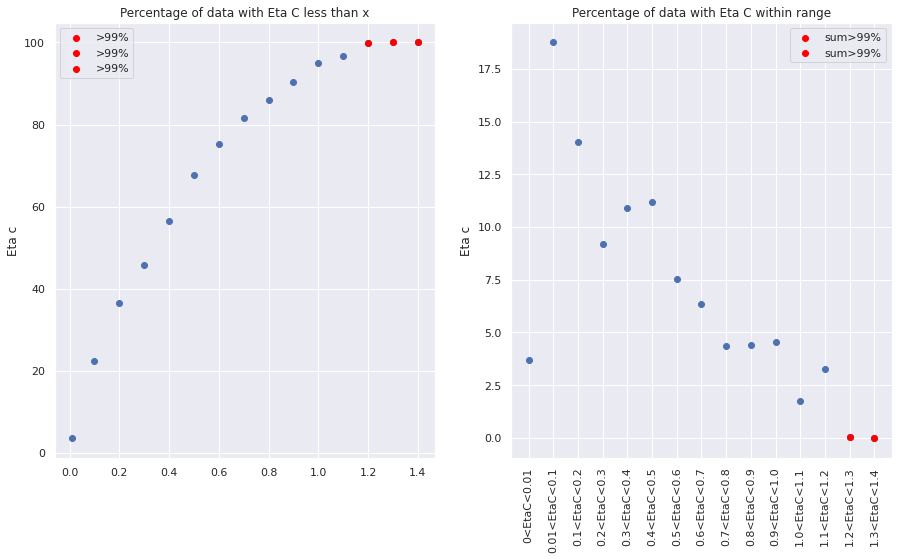

In [27]:
nums = [0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4]
less_than_percents = []
in_range_percents = []
x_ranges = []

# lim_dataset[ (lim_dataset["b1"]<0.1) & (lim_dataset["RatioTotalArea"]<0.2) ]

for i in range(len(nums)):
    less_than_percents.append( ((len(dataset[dataset["eta c"] < nums[i]]))/len(dataset))*100)
    in_range_percents.append( (len(dataset[ (dataset["eta c"]<nums[i]) & (dataset["eta c"] > nums[i-1]) ])/len(dataset))*100 )
    x_ranges.append("{one}<EtaC<{two}".format(one=nums[i-1], two=nums[i]) )

nums.pop(0)
less_than_percents.pop(0)
in_range_percents.pop(0)
x_ranges.pop(0)

fig = plt.figure()
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

ax[0].scatter(nums, less_than_percents)
ax[0].set_ylabel("Percentage")
ax[0].set_ylabel("Eta c")
ax[0].set_title("Percentage of data with Eta C less than x")
for i in range(len(less_than_percents)):
    if less_than_percents[i] > 99.0:
        ax[0].scatter(nums[i], less_than_percents[i], c="red", label=">99%")
ax[0].legend()



ax[1].scatter(x_ranges, in_range_percents)
ax[1].set_ylabel("Percentage")
ax[1].set_ylabel("Eta c")
ax[1].set_title("Percentage of data with Eta C within range")
for i in range(len(in_range_percents)):
    if sum(in_range_percents[0:i])>99:
        ax[1].scatter(x_ranges[i], in_range_percents[i], c="red", label="sum>99%")
ax[1].legend()

plt.xticks(rotation='vertical')


In [28]:
sum(in_range_percents[0:4])

45.695959613423

## Trying Different Scalers
It is possible that using other scaling methods might be better. The 'MinMaxScaler' and 'MaxAbsScaler' are two that can be used. The MinMaxScaler scales a feature between a range like 0 and 1 while the MaxAbsScaler scales the features such that the maximum is 1. Because the data is all positive, the MaxAbsScaler can be used. 



In [29]:
# from sklearn.preprocessing import MinMaxScaler

# scaled_dataset = lim_dataset.copy()

# scaled_dataset['b1'] = MinMaxScaler().fit_transform(lim_dataset['b1'].values.reshape(-1,1))
# scaled_dataset['a2'] = MinMaxScaler().fit_transform(lim_dataset['a2'].values.reshape(-1,1))
# scaled_dataset['RatioTotalArea'] = MinMaxScaler().fit_transform(lim_dataset['RatioTotalArea'].values.reshape(-1,1))
# scaled_dataset['frac'] = MinMaxScaler().fit_transform(lim_dataset['frac'].values.reshape(-1,1))
# scaled_dataset['eta c'] = MinMaxScaler().fit_transform(lim_dataset['eta c'].values.reshape(-1,1))

# fig = plt.figure()
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# sns.distplot(scaled_dataset["b1"], kde=True, color='red', bins=100, ax=axes[0][0])
# axes[0][0].set_title("b1")
# sns.distplot(scaled_dataset["RatioTotalArea"], kde=True, color='red', bins=1000, ax=axes[0][1])
# axes[0][1].set_title("RatioTotalArea")
# sns.distplot(scaled_dataset["a2"], kde=True, color='red', bins=100, ax=axes[1][0])
# axes[1][0].set_title("a2")
# sns.distplot(scaled_dataset["frac"], kde=True, color='red', bins=100, ax=axes[1][1])
# axes[1][1].set_title("frac")

# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/MinMax.png")
# plt.close()

In [30]:
from sklearn.preprocessing import MaxAbsScaler

scaled_dataset = lim_dataset.copy()

scaled_dataset['b1'] = MaxAbsScaler().fit_transform(lim_dataset['b1'].values.reshape(-1,1))
scaled_dataset['a2'] = MaxAbsScaler().fit_transform(lim_dataset['a2'].values.reshape(-1,1))
scaled_dataset['RatioTotalArea'] = MaxAbsScaler().fit_transform(lim_dataset['RatioTotalArea'].values.reshape(-1,1))
scaled_dataset['frac'] = MaxAbsScaler().fit_transform(lim_dataset['frac'].values.reshape(-1,1))
scaled_dataset['eta c'] = MaxAbsScaler().fit_transform(lim_dataset['eta c'].values.reshape(-1,1))

scaled_dataset['r1'] = MaxAbsScaler().fit_transform(lim_dataset['r1'].values.reshape(-1,1))
scaled_dataset['r2'] = MaxAbsScaler().fit_transform(lim_dataset['r2'].values.reshape(-1,1))

# fig = plt.figure()
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# sns.distplot(scaled_dataset["b1"], kde=True, color='red', bins=100, ax=axes[0][0])
# axes[0][0].set_title("b1")
# sns.distplot(scaled_dataset["RatioTotalArea"], kde=True, color='red', bins=1000, ax=axes[0][1])
# axes[0][1].set_title("RatioTotalArea")
# sns.distplot(scaled_dataset["a2"], kde=True, color='red', bins=100, ax=axes[1][0])
# axes[1][0].set_title("a2")
# sns.distplot(scaled_dataset["frac"], kde=True, color='red', bins=100, ax=axes[1][1])
# axes[1][1].set_title("frac")

# sns.distplot(scaled_dataset["r1"], kde=True, color='red', bins=100, ax=axes[0][0])
# axes[0][0].set_title("r1")
# sns.distplot(scaled_dataset["r2"], kde=True, color='red', bins=1000, ax=axes[0][1])
# axes[0][1].set_title("r2")
# sns.distplot(scaled_dataset["eta c"], kde=True, color='red', bins=100, ax=axes[1][0])
# axes[1][0].set_title("Scaled eta c")
# sns.distplot(dataset["eta c"], kde=True, color='red', bins=100, ax=axes[1][1])
# axes[1][1].set_title("Unscaled eta c")

# fig.savefig("/media/nirav/34E0-F309/KTH/Thesis/edited_data/exp_dataset/MaxAbs.png")
# plt.close()

MinMax

![MinMax](exp_dataset/MinMax.png)

AbsMax

![MaxAbs](exp_dataset/MaxAbs.png)


In [31]:
fin_ds = dataset[["b1","a2","RatioTotalArea","frac", "eta c"]]
fin_ds2 = dataset[["r1","r2", "a2", "RatioTotalArea","frac", "eta c"]]
fin_us_ds = lim_dataset[["b1","a2","RatioTotalArea","frac", "eta c"]]
fin_s_ds = scaled_dataset[["b1","a2","RatioTotalArea","frac", "eta c"]]

print(fin_ds.tail())
print("Length:", len(fin_ds))
print()
print(fin_ds2.tail())
print("Length:", len(fin_ds2))
print()
print(fin_us_ds.tail())
print("Length:", len(fin_us_ds))
print()
print(fin_s_ds.tail())
print("Length:", len(fin_s_ds))

         b1   a2  RatioTotalArea  frac     eta c
57836  0.01  0.5        0.010112  0.95  0.055421
57837  0.01  0.5        0.008247  0.95  0.045398
57838  0.01  0.5        0.004516  0.95  0.025122
57839  0.01  0.5        0.002278  0.95  0.012753
57840  0.01  0.5        0.001532  0.95  0.008594
Length: 57841

       r1    r2   a2  RatioTotalArea  frac     eta c
57836  50    80  0.5        0.010112  0.95  0.055421
57837  50   100  0.5        0.008247  0.95  0.045398
57838  50   200  0.5        0.004516  0.95  0.025122
57839  50   500  0.5        0.002278  0.95  0.012753
57840  50  1000  0.5        0.001532  0.95  0.008594
Length: 57841

         b1   a2  RatioTotalArea  frac     eta c
57836  0.01  0.5        0.010112  0.95  0.055421
57837  0.01  0.5        0.008247  0.95  0.045398
57838  0.01  0.5        0.004516  0.95  0.025122
57839  0.01  0.5        0.002278  0.95  0.012753
57840  0.01  0.5        0.001532  0.95  0.008594
Length: 42016

         b1   a2  RatioTotalArea  frac     eta c


In [ ]:
# fin_ds.to_csv("data.csv")
# fin_ds2.to_csv("data2.csv")
# fin_us_ds.to_csv("LIM_unscaled.csv")
# fin_s_ds.to_csv("LIM_scaled.csv")

In [55]:
dataset.tail()
# dataset.sort_values(["eta c"])["eta c"].to_numpy()

r1  2a2    r2  frac       Nc  Nc Std. Dev     eta c   a1    b1   a2  \
57836  50  1.0    80  0.95  5.48069     0.006233  0.055421  0.5  0.01  0.5   
57837  50  1.0   100  0.95  5.50498     0.005186  0.045398  0.5  0.01  0.5   
57838  50  1.0   200  0.95  5.56282     0.005627  0.025122  0.5  0.01  0.5   
57839  50  1.0   500  0.95  5.59909     0.006185  0.012753  0.5  0.01  0.5   
57840  50  1.0  1000  0.95  5.61126     0.005453  0.008594  0.5  0.01  0.5   

            b2     area1     area2  TotalArea  RatioTotalArea  
57836  0.00625  0.015708  0.009817   0.025525        0.010112  
57837  0.00500  0.015708  0.007854   0.023562        0.008247  
57838  0.00250  0.015708  0.003927   0.019635        0.004516  
57839  0.00100  0.015708  0.001571   0.017279        0.002278  
57840  0.00050  0.015708  0.000785   0.016493        0.001532

In [66]:
sorted_.tail()

r1   2a2  r2  frac        Nc  Nc Std. Dev    eta c   a1    b1     a2  \
50771   2  0.05   1  0.99  219.9140     0.361624  1.29108  0.5  0.25  0.025   
47320   1  0.20   1  0.95   18.7568     0.021209  1.29638  0.5  0.50  0.100   
48104   1  0.05   1  0.99  134.6840     0.216048  1.31961  0.5  0.50  0.025   
47707   1  0.10   2  0.99  115.9700     0.142610  1.36169  0.5  0.50  0.050   
47673   1  0.10   1  0.99   91.2421     0.158586  1.42606  0.5  0.50  0.050   

          b2     area1     area2  TotalArea  RatioTotalArea  
50771  0.025  0.392699  0.001963   0.394663        0.005871  
47320  0.100  0.785398  0.031416   0.816814        0.069115  
48104  0.025  0.785398  0.001963   0.787362        0.009798  
47707  0.025  0.785398  0.003927   0.789325        0.011742  
47673  0.050  0.785398  0.007854   0.793252        0.015629

Text(0, 0.5, 'frac')

<Figure size 432x288 with 0 Axes>

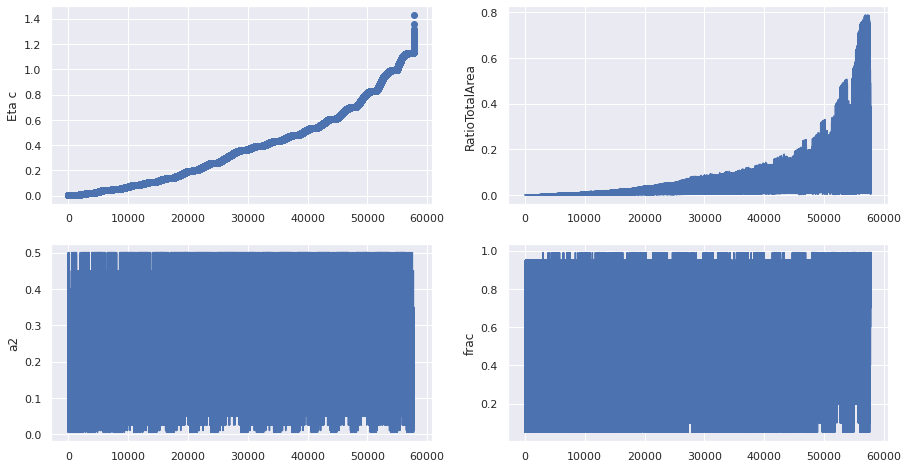

In [65]:
sorted_ = dataset.sort_values(["eta c"])

fig = plt.figure()
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,8))

ax[0][0].scatter(np.arange(0,len(dataset)), sorted_["eta c"].to_numpy())
ax[0][0].set_ylabel("Eta c")

ax[0][1].plot(np.arange(0,len(dataset)), sorted_["RatioTotalArea"].to_numpy())
ax[0][1].set_ylabel("RatioTotalArea")

ax[1][0].plot(np.arange(0,len(dataset)), sorted_["a2"].to_numpy())
ax[1][0].set_ylabel("a2")

ax[1][1].plot(np.arange(0,len(dataset)), sorted_["frac"].to_numpy())
ax[1][1].set_ylabel("frac")

## Check the data

In [ ]:
name = "LIM_scaled.csv"
data2 = pd.read_csv(name)
# data2.describe().transpose()
data2.pop("Unnamed: 0")
data2.describe().transpose()

In [ ]:
fig = plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

sns.distplot(data2["b1"], kde=True, color='red', bins=100, ax=axes[0][0])
axes[0][0].set_title("b1")
sns.distplot(data2["RatioTotalArea"], kde=True, color='red', bins=1000, ax=axes[0][1])
axes[0][1].set_title("RatioTotalArea")
sns.distplot(data2["a2"], kde=True, color='red', bins=100, ax=axes[1][0])
axes[1][0].set_title("a2")
sns.distplot(data2["frac"], kde=True, color='red', bins=100, ax=axes[1][1])
axes[1][1].set_title("frac")